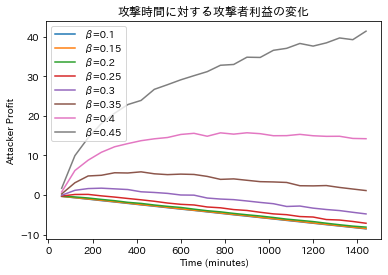

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib

# 日本語フォントの設定
matplotlib.rcParams['font.family'] = 'IPAexGothic'

# bの値のリスト
b_values = ['b01', 'b015', 'b02', 'b025', 'b03', 'b035', 'b04', 'b045']
# 1ブロックあたりの報酬(BTC)
b_reward: float = 6.25
# 1秒あたりのコスト(BTC) 1/21 17:28 51%攻撃に必要な計算コスト$1,550,860/1hours→1%を占めるノードの計算コスト $1,550,860*49/(51*100) / 60 /60 = $4.13900544662/seconds
# 1/21 17:28 1ドル 0.000024BTC
cost_per_sec: float = 4.13900544662 * 0.000024

def b_to_beta(b):
    return float(b[1]+"." +b[2:])


for b in b_values:
    times = []
    attacker_profit_list = []
    
    # ファイル名を生成してデータを読み込む
    for i in range(1, 25):  # 60から1440まで60刻み
        filename = f"../1m/{b}_at{i*60}.csv"
        if os.path.exists(filename):
            data = pd.read_csv(filename)
            #Attackerの利益を計算 攻撃者の割合がb，攻撃時間がi*60の時の利益を計算．csvファイル中の行分のループを回す．
            attacker_profit = 0
            for j in range(len(data)):
                if data.iloc[j, 1] == 1:
                    attacker_profit += data.iloc[j,3] * b_reward - data.iloc[j, 2] * cost_per_sec
                else:
                    attacker_profit -= data.iloc[j, 2] * cost_per_sec
            #1回あたりの利益をリストに追加
            attacker_profit = attacker_profit / len(data)
            attacker_profit_list.append(attacker_profit)
            times.append(i * 60)
        else:
            print(f"File not found: {filename}")
    
    # bの値をβの値に変換して凡例を設定
    beta_value = b_to_beta(b)  # 例：b01を0.1に変換
    legend_label = f"β={beta_value}"

    # それぞれのbの値についてグラフを描画
    plt.plot(times, attacker_profit_list, label=legend_label)
    
# # 攻撃しなかった場合の利益を計算
# for b in b_values:
#     beta_value = b_to_beta(b)  # 例：b01を0.1に変換
#     times = []
#     attacker_profit_list = []
#     for i in range(1, 25):
#         times.append(i * 60)
#         expeceted_num_of_blocks = i*60/10
#         attacker_profit = expeceted_num_of_blocks * beta_value * b_reward - i*60*60*cost_per_sec
#         attacker_profit_list.append(attacker_profit)
        
#     # 凡例を設定
#     legend_label = f"β={beta_value}, no attack"

#     # それぞれのbの値についてグラフを描画
#     plt.plot(times, attacker_profit_list, label=legend_label)

plt.xlabel('Time (minutes)')
plt.ylabel('Attacker Profit')
plt.title('攻撃時間に対する攻撃者利益の変化')
plt.legend()
plt.show()